# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow
tensorflow.__version__

'2.2.0-rc3'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  /content


In [0]:
os.chdir("/content/drive/My Drive/Semantic Project")
print("Current Working Directory " , os.getcwd())

Current Working Directory  /content/drive/My Drive/Semantic Project


### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "Aligned Face Dataset from Pinterest.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Streaming output truncated to the last 5000 lines.
pins/PINS/pins_Sophie Turner/Sophie Turner5_1638.jpg 2019-10-21 08:51:32        23092
pins/PINS/pins_Sophie Turner/Sophie Turner60_1650.jpg 2019-10-21 08:51:32        35500
pins/PINS/pins_Sophie Turner/Sophie Turner61_1725.jpg 2019-10-21 08:51:32        16750
pins/PINS/pins_Sophie Turner/Sophie Turner62_1698.jpg 2019-10-21 08:51:32        18709
pins/PINS/pins_Sophie Turner/Sophie Turner64_1722.jpg 2019-10-21 08:51:32        22250
pins/PINS/pins_Sophie Turner/Sophie Turner65_1682.jpg 2019-10-21 08:51:32        20076
pins/PINS/pins_Sophie Turner/Sophie Turner66_1688.jpg 2019-10-21 08:51:32        21696
pins/PINS/pins_Sophie Turner/Sophie Turner68_1651.jpg 2019-10-21 08:51:32        22621
pins/PINS/pins_Sophie Turner/Sophie Turner69_1662.jpg 2019-10-21 08:51:32        25480
pins/PINS/pins_Sophie Turner/Sophie Turner70_1642.jpg 2019-10-21 08:51:32        16911
pins/PINS/pins_Sophie Turner/Sophie Turner71_1751.jpg 2019-10-21 08:51:32       

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [0]:
image = load_image(metadata[0].image_path())
print(image)

[[[233 188 165]
  [231 186 163]
  [220 178 156]
  ...
  [106  63  72]
  [106  63  72]
  [106  63  72]]

 [[232 187 164]
  [233 188 165]
  [220 178 156]
  ...
  [106  63  72]
  [106  63  72]
  [106  63  72]]

 [[230 186 161]
  [228 184 159]
  [206 164 140]
  ...
  [106  63  72]
  [106  63  72]
  [106  63  72]]

 ...

 [[198 118  91]
  [197 120  94]
  [195 119  95]
  ...
  [ 78  66  76]
  [ 78  66  76]
  [ 78  66  76]]

 [[200 120  93]
  [200 120  93]
  [198 121  95]
  ...
  [ 78  66  76]
  [ 78  66  76]
  [ 78  66  76]]

 [[201 121  94]
  [201 121  94]
  [199 122  96]
  ...
  [ 78  66  76]
  [ 78  66  76]
  [ 78  66  76]]]


In [0]:
print(metadata.shape)


(10770,)


(301, 299, 3)


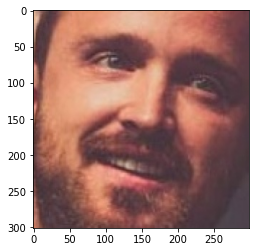

In [0]:
import matplotlib.pyplot as plt
plt.imshow(image)
print(image.shape)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()

# Print summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [0]:
# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [0]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
embedded = np.zeros((metadata.shape[0],2622))

for i,m in enumerate(metadata):
  img = load_image(m.image_path())
  # scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  # obtain embedding vector for image
  embedded[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  print(embedded[i])

Streaming output truncated to the last 5000 lines.
  0.03422809]
[ 0.00499383 -0.00823975 -0.00180315 ... -0.01962952 -0.00314487
  0.01784144]
[ 0.00744878 -0.0063738  -0.00806533 ... -0.02425039 -0.01025492
  0.01866554]
[ 0.00552943 -0.00765456 -0.0003395  ... -0.00857599 -0.00658651
  0.01502586]
[ 0.00529021 -0.00472772  0.00634351 ...  0.00688012  0.01091713
  0.02026568]
[ 0.00713372 -0.01255304 -0.0127503  ...  0.00280311  0.00177742
  0.02293629]
[ 0.00259874  0.00614739  0.02089763 ... -0.00347699 -0.00769709
  0.03034069]
[ 0.00914895  0.00296543  0.00924125 ... -0.00817495 -0.00184946
  0.01206812]
[ 0.00348159  0.00096304 -0.00687866 ...  0.00553448  0.01370952
  0.03514026]
[ 0.0040372  -0.00951968  0.00851167 ... -0.01181788  0.00080782
  0.02192726]
[ 0.01998655 -0.01317017 -0.00495728 ... -0.00437998  0.00489091
  0.00642333]
[ 0.00851357 -0.00739622  0.00141999 ... -0.01598307  0.00815656
  0.01303157]
[ 0.01698706 -0.00354962 -0.00401759 ... -0.02289815 -0.00480131
 

In [0]:
print(embedded.shape)

(10770, 2622)


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

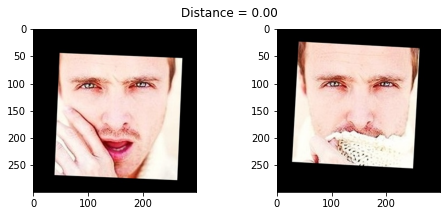

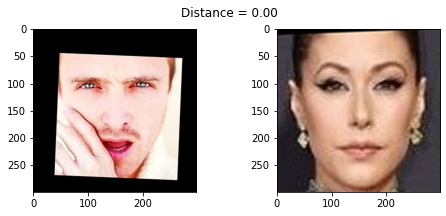

In [0]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
import numpy as np

train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####
x_train = embedded[train_idx]
print (x_train.shape)
x_test = embedded[test_idx]
print (x_test.shape)


(9573, 2622)
(1197, 2622)


### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)
print(y)

[ 0  0  0 ... 99 99 99]


In [0]:
y_train = y[train_idx]
y_test = y[test_idx]

print(y_train.shape)
print(y_test.shape)

(9573,)
(1197,)


### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
print(train_idx)
print(train_idx.shape)
print('------------------------------------------------------------')
print(test_idx)
print(test_idx.shape)
print('------------------------------------------------------------')
print(x_train)
print(x_train.shape)
print('------------------------------------------------------------')
print(y_train)
print(y_train.shape)
print('------------------------------------------------------------')
print(x_test)
print(x_test.shape)

[False  True  True ...  True  True  True]
(10770,)
------------------------------------------------------------
[ True False False ... False False False]
(10770,)
------------------------------------------------------------
[[ 0.03497704 -0.00105059 -0.01248933 ... -0.01053091  0.0017932
   0.02439154]
 [ 0.02801892 -0.00112629 -0.01265749 ... -0.00904748 -0.00578399
   0.02125829]
 [ 0.01505304 -0.00503206 -0.00155372 ... -0.00577053 -0.00593261
   0.01585887]
 ...
 [ 0.00965871  0.00372159 -0.01345864 ... -0.01433404  0.01899943
   0.03899154]
 [ 0.00230931  0.00094764 -0.00544815 ... -0.01600495  0.01053974
   0.03683253]
 [ 0.01772299  0.01064049  0.01995195 ... -0.02618429  0.03288926
   0.04882648]]
(9573, 2622)
------------------------------------------------------------
[ 0  0  0 ... 99 99 99]
(9573,)
------------------------------------------------------------
[[ 0.03170307 -0.0150513  -0.01243402 ...  0.00043141  0.00219081
  -0.00908097]
 [ 0.02626053  0.00147696 -0.00927285

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scalar = StandardScaler()
print(scalar.fit(x_train))
print(x_train.shape)
print(scalar.fit(x_test))
print(x_test.shape)

StandardScaler(copy=True, with_mean=True, with_std=True)
(9573, 2622)
StandardScaler(copy=True, with_mean=True, with_std=True)
(1197, 2622)


### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 1197 ) 
pca.fit(x_train) 
pca.fit(x_test)
x_train_pca = pca.transform(x_train) 
x_test_pca = pca.transform(x_test)

#let's check the shape of X_pca array
print(x_train_pca.shape)
print(x_test_pca.shape)


(9573, 1197)
(1197, 1197)


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
#fit to the trainin data
svc.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred = svc.predict(x_test)

In [0]:
print(y_pred)

[ 0  0  0 ... 99 99 99]


In [0]:
from sklearn.metrics import accuracy_score
acc_svc = accuracy_score(y_test, y_pred)
print(acc_svc)

0.9682539682539683


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

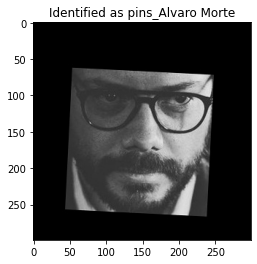

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embedded[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');